In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=batch_size,
    shuffle=True
)

testset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
test_loader = torch.utils.data.DataLoader(
    testset, 
    batch_size=batch_size,
    shuffle=False
)

classes = trainset.classes
classes

Files already downloaded and verified
Files already downloaded and verified


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

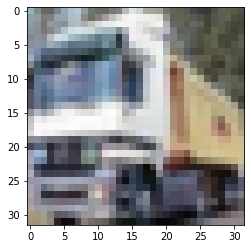

In [3]:
import matplotlib.pyplot as plt

images=train_loader.dataset[1][0]
plt.imshow(images.permute(1, 2, 0))

In [4]:
images.size() # [3, 32, 32]: 3 -> RGB, 32x32 

torch.Size([3, 32, 32])

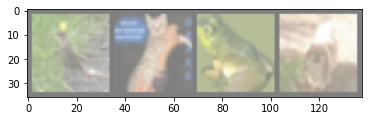

 bird   cat  frog   dog


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 불러오는 함수
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 학습용 이미지 무작위 추출
dataiter = iter(train_loader)
images, labels = dataiter.next()

# 이미지랑 정답 출력
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [15]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5) #rgb라 이미지 채널 3개
        self.pool = nn.MaxPool2d(2, 2, 1)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.conv3 = nn.Conv2d(32, 64, 5)
        self.fc1 = nn.Linear(64*2*2, 192)
        self.fc2 = nn.Linear(192, 128)
        self.fc3 = nn.Linear(128, 84)
        self.fc4 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64*2*2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.fc4(x)
        return x


net = Net()

In [16]:
# loss and optimizer
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(),lr=learning_rate)

In [26]:
for epoch in range(10):   # 데이터셋을 수차례 반복

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        # optimizer의 기울기를 0으로 만들기 (변화도가 누적되지 않게 하기 위해)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # 기울기 계산
        loss.backward()
        # 업데이트
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.322
[1,  4000] loss: 1.285
[1,  6000] loss: 1.272
[1,  8000] loss: 1.301
[1, 10000] loss: 1.244
[1, 12000] loss: 1.268
[2,  2000] loss: 1.210
[2,  4000] loss: 1.211
[2,  6000] loss: 1.223
[2,  8000] loss: 1.221
[2, 10000] loss: 1.199
[2, 12000] loss: 1.189
[3,  2000] loss: 1.162
[3,  4000] loss: 1.162
[3,  6000] loss: 1.140
[3,  8000] loss: 1.155
[3, 10000] loss: 1.162
[3, 12000] loss: 1.134
[4,  2000] loss: 1.107
[4,  4000] loss: 1.092
[4,  6000] loss: 1.103
[4,  8000] loss: 1.096
[4, 10000] loss: 1.085
[4, 12000] loss: 1.112
[5,  2000] loss: 1.097
[5,  4000] loss: 1.050
[5,  6000] loss: 1.034
[5,  8000] loss: 1.060
[5, 10000] loss: 1.067
[5, 12000] loss: 1.080
[6,  2000] loss: 1.003
[6,  4000] loss: 1.018
[6,  6000] loss: 1.052
[6,  8000] loss: 1.017
[6, 10000] loss: 1.033
[6, 12000] loss: 1.044
[7,  2000] loss: 0.989
[7,  4000] loss: 0.979
[7,  6000] loss: 0.999
[7,  8000] loss: 1.012
[7, 10000] loss: 1.016
[7, 12000] loss: 1.001
[8,  2000] loss: 0.952
[8,  4000] 

In [27]:
# 학습 모델을 저장
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

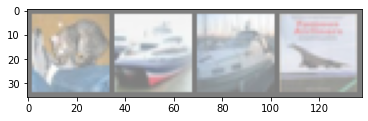

GroundTruth:    cat  ship  ship airplane


In [28]:
# 시험용 데이터
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [29]:
outputs = net(images)

In [30]:
# 신경망 예측 결과
_, predicted = torch.max(outputs, 1) # 가장 높은 값을 뽑아줌

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship airplane


In [31]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images) # 가장 높은 값을 갖는 분류를 정답으로 선택
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [32]:
# 각 분류에 대한 예측갑 정리
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1) # 각 분류별 올바른 예측을 모아줌
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도 출력
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class airplane is: 71.3 %
Accuracy for class automobile is: 76.7 %
Accuracy for class bird  is: 35.7 %
Accuracy for class cat   is: 19.3 %
Accuracy for class deer  is: 65.7 %
Accuracy for class dog   is: 61.6 %
Accuracy for class frog  is: 75.0 %
Accuracy for class horse is: 69.2 %
Accuracy for class ship  is: 80.1 %
Accuracy for class truck is: 75.3 %


Batch size가 4이기 때문에 이미지가 4개씩 나오고, shuffle을 이용해서 누를때마다 랜덤으로 4개의 이미지가 나온다. CIFAR10은 흑백이 아닌 RGB를 이용하기 때문에 채널을 3으로 해줘야 한다. 신경망은 input을 받아 여러 계층에 차례대로 전달한 후, 최종 output을 제공해준다. 일반적인 학습 과정은 학습 가능한 매개변수를 갖는 신경망을 정의하고, 데이터셋 입력을 반복한다. 그리고 입력을 신경망에서 전파하고, 손실을 계산한다. 마지막으로 변화도를 신경망의 매개변수들에 역으로 전파하고, 신경망의 매개변수를 갱신한다. 손실함수와 optimizer을 정의해준다. 데이터 반복을 통해서 신경망을 학습을 시켜준다. Epoch는 반복 횟수를 정해주는데, 적으면 많이 틀리고, 너무 많으면 과적합 문제가 발생한다. 기울기를 측정하기 위한 backpropagation과정은 여러 단계를 계속해서 미분해야 하기 때문에 구현하고자 하면 복잡한데, pytorch 라이브러리를 이용해 쉽게 할 수 있다. 신경망이 잘 학습했는지 확인하기 위해 이미지 4개를 뽑아내고, 결과를 확인해 본 결과 3개 맞은 것을 확인할 수 있었다. 그리고 전체 데이터셋의 정확도를 확인하였다. 처음 작성한 코드가 정확도가 낮아 epoch를 더 늘렸는데, 7번째 돌렸을 때부터 과적합이 일어났다. 하지만 최종적 10번까지 돌렸을 때 이전보다 높은 정확도가 나와 2번 돌렸을 때 보단 더 나은 결과를 얻을 수 있었다.